In [708]:
# import necessary packages
!pip install wbdata
!pip install CFEDemands
!pip install pint

import ndb
import pandas as pd
import warnings
from  scipy.optimize import linprog as lp
import numpy as np
import wbdata 
import warnings
warnings.filterwarnings('ignore')

In [709]:
!pip install CFEDemands --upgrade
!pip install xarray

Requirement already up-to-date: CFEDemands in /anaconda3/lib/python3.6/site-packages (0.1.6.6)


In [710]:
SHEETs = [# All Food
          ("https://docs.google.com/spreadsheet/ccc?key=1nkwKO01nDmLCHqiq4cE1N1LQYM-oNgrvhkwB92PCtE4","All"), 
         ]

## Minimum Cost Diet

In [651]:
import ndb
import pandas as pd
import warnings

DFs = []
#for csv in CSVs:  # Uncomment to use a list of csv files as inputs
#  DFs.append(pd.read_csv(csv,dtype=str))

try:
    if len(SHEETs):
        for ID, RANGE_NAME in SHEETs:
            try:
                if "docs.google.com" in ID:
                    sheet = "%s&output=csv" % ID
                else:
                    sheet = "https://docs.google.com/spreadsheet/ccc?key=%s&output=csv" % ID
                DFs.append(pd.read_csv(sheet))
            except ParserError:
                warnings.warn("Can't read sheet at https://docs.google.com/spreadsheets/d/%s.\nCheck Sharing settings, so that anyone with link can view?" % ID)
except NameError: # SHEETS not defined?
    pass

df = pd.concat(DFs,ignore_index=True,sort=False)
# Some columns which ought to be numeric are actually str; convert them
df['Price'] = df['Price'].astype(float)
df['Quantity'] = df['Quantity'].astype(float)
df["Units"] = df["Units"].astype(str)
df["Value"] = df["Value"].dropna().astype(int).astype(str)
df["NDB"][df['Food'].str.contains("Milk shakes and other dairy drinks")] = str("01110")
df["NDB"] = df["NDB"].dropna()

prices_df = df

In [652]:
values = df["Value"].tolist()
names = df["Food"].tolist()
value_name_dict = dict(zip(values,names))

In [653]:
user = "atwater"
apikey = {'atwater':"ekh9KVmwQxokFmje0yDKJsSdG5PCuxWpXphJMEB3"}
age_list = ["C 1-3", "F 4-8", "M 4-8", "F 9-13", "M 9-13", "F 14-18", "M 14-18", "F 19-30", "M 19-30",\
            "F 31-50", "M 31-50", "F 51+", "M 51+"]
#http://www.censusscope.org/us/chart_age.html
age_breakdown = [6.82, 3.56, 3.74, 3.56, 3.74, 3.49, 3.69, 6.71, 6.92,\
                15.32, 15.15, 15.01, 12.32]
    
    
import ndb
D = {}

for food in  df.Food.tolist():
    try:
        NDB = df.loc[df.Food==food,:].NDB
        D[food] = ndb.ndb_report(apikey[user],NDB).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find NDB Code %s for food %s." % (food,NDB))
        

D = pd.DataFrame(D,dtype=float)

D = D.reindex(sorted(D.columns), axis=1)

D

Apple juice  Apples     Bacon  \
Caffeine                                    NaN     NaN     0.000   
Calcium, Ca                               17.00    6.00    80.000   
Carbohydrate, by difference               46.67   14.29     1.890   
Cholesterol                                0.00    0.00    86.000   
Energy                                   183.00   52.00   226.000   
Fatty acids, total monounsaturated          NaN     NaN     6.223   
Fatty acids, total polyunsaturated          NaN     NaN     4.699   
Fatty acids, total saturated               0.00    0.00     4.520   
Fatty acids, total trans                   0.00    0.00     0.184   
Fiber, total dietary                       0.00    3.20       NaN   
Folate, DFE                                 NaN     NaN       NaN   
Iron, Fe                                   0.60    0.19     1.400   
Magnesium, Mg                               NaN     NaN    16.000   
Niacin                                      NaN     NaN     4.032   
Phosphorus, P                               NaN     NaN   222.000   
Potassium, K                             350.00  110.00   349.000   
Protein                                    0.00    0.32    15.940   
Riboflavin                                  NaN     NaN     0.237   
Sodium, Na                                 0.00    0.00  1069.000   
Sugars, total                             45.00   10.39       NaN   
Thiamin                                     NaN     NaN     0.030   
Total lipid (fat)                          0.00    0.00    16.930   
Vitamin A, IU                               NaN     NaN    34.000   
Vitamin A, RAE                              NaN     NaN    10.000   
Vitamin B-12                                NaN     NaN     1.190   
Vitamin B-6                                 NaN     NaN     0.244   
Vitamin C, total ascorbic acid           120.00     NaN       NaN   
Vitamin D                                  0.00    0.00       NaN   
Vitamin D (D2 + D3)                         NaN     NaN       NaN   
Vitamin E (alpha-tocopherol)                NaN     NaN     0.110   
Vitamin K (phylloquinone)                   NaN     NaN       NaN   
Water                                       NaN     NaN    61.830   
Zinc, Zn                                    NaN     NaN     2.540   

                                    Bagels and English muffins  Bananas  \
Caffeine                                                   NaN      NaN   
Calcium, Ca                                              21.00    39.00   
Carbohydrate, by difference                              53.68    67.50   
Cholesterol                                               0.00     0.00   
Energy                                                  263.00   425.00   
Fatty acids, total monounsaturated                         NaN      NaN   
Fatty acids, total polyunsaturated                         NaN      NaN   
Fatty acids, total saturated                              0.00    12.50   
Fatty acids, total trans                                  0.00     0.00   
Fiber, total dietary                                      3.20    10.00   
Folate, DFE                                                NaN      NaN   
Iron, Fe                                                  1.52     5.75   
Magnesium, Mg                                              NaN      NaN   
Niacin                                                     NaN      NaN   
Phosphorus, P                                              NaN      NaN   
Potassium, K                                               NaN   855.00   
Protein                                                  10.53     5.00   
Riboflavin                                                 NaN      NaN   
Sodium, Na                                              432.00     0.00   
Sugars, total                                             2.11    42.50   
Thiamin                                                    NaN      NaN   
Total lipid (fat)                      

In [654]:
# Convert food quantities to NDB units
df['NDB Quantity'] = df[['Quantity','Units']].T.apply(lambda x : ndb.ndb_units(x['Quantity'],x['Units']))

# Now may want to filter df by time or place--need to get a unique set of food names.
df['NDB Price'] = df['Price']/df['NDB Quantity']

df.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
Prices = df.groupby('Food')['NDB Price'].min()

In [655]:
# Choose sex/age group:
group = "M 19-30"

# Define *minimums*
bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]

# Define *maximums*
bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]

In [656]:

from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Numbers in solution smaller than this (in absolute value) treated as zeros

c = Prices.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
c = c[use]

# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[c.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall.loc[bmin.index]

Amax = Aall.loc[bmax.index]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([-Amin,Amax])

b = pd.concat([-bmin,bmax]) # Note sign change for min constraints

# Now solve problem!
result = lp(c, A, b, method='interior-point')

# Put back into nice series
diet = pd.Series(result.x,index=c.index)

print("Cost of diet for %s is $%4.2f per day." % (group,result.fun))
print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.

tab = pd.DataFrame({"Outcome":np.abs(A).dot(diet),"Recommendation":np.abs(b)})
print("\nWith the following nutritional outcomes of interest:")
print(tab)

print("\nConstraining nutrients are:")
excess = tab.diff(axis=1).iloc[:,1]
print(excess.loc[np.abs(excess) < tol].index.tolist())

Cost of diet for M 19-30 is $9.01 per day.

You'll be eating (in 100s of grams or milliliters):
Food
Bananas                              1.895084
Citrus juice                         8.427623
Read to eat cereal, higher sugar     0.057732
Milk, reduced fat                    1.987887
Ready-to-eat cereal, lower sugar     0.433347
Carrots                             17.576867
Tomatoes                             5.447610
Milk, low fat                        1.987887
dtype: float64

With the following nutritional outcomes of interest:
                                     Outcome  Recommendation
Nutrition                                                   
Energy                           2400.000000          2400.0
Protein                            56.000000            56.0
Fiber, total dietary               82.939521            33.6
Folate, DFE                       932.888945           400.0
Calcium, Ca                      2716.922563          1000.0
Carbohydrate, by difference       4

In [657]:
age_list = ["C 1-3", "F 4-8", "M 4-8", "F 9-13", "M 9-13", "F 14-18", "M 14-18", "F 19-30", "M 19-30",\
            "F 31-50", "M 31-50", "F 51+", "M 51+"]
lowest_price_diet = []
for age in age_list:
    group = age
    bmin = pd.read_csv('./diet_minimums.csv').set_index('Nutrition')[group]
    bmax = pd.read_csv('./diet_maximums.csv').set_index('Nutrition')[group]
    tol = 1e-6
    c = Prices.apply(lambda x:x.magnitude).dropna()
    use = list(set(c.index.tolist()).intersection(D.columns.tolist()))
    c = c[use]
    Aall = D[c.index].fillna(0)
    Amin = Aall.loc[bmin.index]
    Amax = Aall.loc[bmax.index]
    A = pd.concat([-Amin,Amax])
    b = pd.concat([-bmin,bmax])
    result = lp(c, A, b, method='interior-point')
    diet = pd.Series(result.x,index=c.index)
    lowest_price_diet.append(result.fun)
d = {'Age/Sex Group': age_list, 'Lowest Price Diet ($ / Day)': lowest_price_diet}
total_dataframe = pd.DataFrame(data=d)
total_dataframe = total_dataframe.set_index("Age/Sex Group")
total_dataframe["Population Percentage"] = age_breakdown
total_dataframe["Weighted Cost"] = total_dataframe["Population Percentage"].astype(float) / 100 * total_dataframe["Lowest Price Diet ($ / Day)"]

print("The average weighted minimum cost diet is $" + str(np.round(sum(total_dataframe["Weighted Cost"]),2)) +" per person")
total_dataframe


The average weighted minimum cost diet is $8.06 per person


Lowest Price Diet ($ / Day)  Population Percentage  \
Age/Sex Group                                                       
C 1-3                             4.729945                   6.82   
F 4-8                             4.498532                   3.56   
M 4-8                             4.535881                   3.74   
F 9-13                            6.415767                   3.56   
M 9-13                            6.453116                   3.74   
F 14-18                           8.695273                   3.49   
M 14-18                           9.010311                   3.69   
F 19-30                           8.620749                   6.71   
M 19-30                           9.008892                   6.92   
F 31-50                           8.625695                  15.32   
M 31-50                           9.102328                  15.15   
F 51+                             8.526299                  15.01   
M 51+                             9.102115                  12.32   

               Weighted Cost  
Age/Sex Group                 
C 1-3               0.322582  
F 4-8               0.160148  
M 4-8               0.169642  
F 9-13              0.228401  
M 9-13              0.241347  
F 14-18             0.303465  
M 14-18             0.332480  
F 19-30             0.578452  
M 19-30             0.623415  
F 31-50             1.321456  
M 31-50             1.379003  
F 51+               1.279797  
M 51+               1.121381

## Regional Household Expenditures

In [658]:
all_households = pd.read_csv('faps_household_puf.csv', dtype=str)

In [659]:
northeast = all_households[all_households["region"] == "1"]
midwest = all_households[all_households["region"] == "2"]
south = all_households[all_households["region"] == "3"]
west = all_households[all_households["region"] == "4"]

In [660]:
hh_choice = pd.read_csv('faps_fafhnutrient_puf.csv', dtype=str)

In [661]:
hh_choice["food"] = hh_choice["usdafoodcat4"].map(value_name_dict)

In [662]:
hh_choice['gramstotal'] = hh_choice['gramstotal'].astype(float)

In [663]:
northeast_hh = hh_choice[hh_choice["hhnum"].isin(northeast["hhnum"])]
midwest_hh = hh_choice[hh_choice["hhnum"].isin(midwest["hhnum"])]
south_hh = hh_choice[hh_choice["hhnum"].isin(south["hhnum"])]
west_hh = hh_choice[hh_choice["hhnum"].isin(west["hhnum"])]

northeast_hh['gramstotal'] = northeast_hh['gramstotal'].astype(float)
midwest_hh['gramstotal'] = midwest_hh['gramstotal'].astype(float)
south_hh['gramstotal'] = south_hh['gramstotal'].astype(float)
west_hh['gramstotal'] = west_hh['gramstotal'].astype(float)

In [664]:
import re
def numbers(value):
    return re.findall(r'\d+.\d+', value)
list_price = Prices.astype(str).apply(numbers)
def first_list(value):
    if len(value) >= 1:
        return float(value[0])
    else:
        return float(0)
corrected_prices = list_price.apply(first_list)

In [665]:
hh_stats = pd.read_csv('faps_individual_puf.csv', dtype=str)
hh_stats["hhnum"] = hh_stats["HHNUM"]
hh_stats_number_of_people = len(hh_stats)
hh_stats_average_number_days = np.average(hh_stats["INITFINALDAYS"].astype(float))

In [666]:
northeast_hh_number_of_people = len(hh_stats[hh_stats["HHNUM"].isin(northeast["hhnum"])])
midwest_hh_number_of_people = len(hh_stats[hh_stats["HHNUM"].isin(midwest["hhnum"])])
south_hh_number_of_people = len(hh_stats[hh_stats["HHNUM"].isin(south["hhnum"])])
west_hh_number_of_people = len(hh_stats[hh_stats["HHNUM"].isin(west["hhnum"])])

In [667]:
min_cost = ['filler']
regions = [hh_choice, northeast_hh, midwest_hh, south_hh, west_hh, min_cost]
values = []
households = []
number_of_people = []
monthly_income = []
measurement_time = []
for region in regions:
    if len(region) == 1:
        values.append(5.38)
        region = hh_choice
        food_df = pd.DataFrame()
        food_df["Foods"] = region.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])])
        monthly_income.append(np.average(all_households[all_households["hhnum"].isin(region["hhnum"])]['inchhavg_r'].astype(float)))
        households.append(len(hh_stats[hh_stats["hhnum"].isin(region["hhnum"])]["hhnum"].unique()))
        number_of_people.append(len(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])]))
        region['gramstotal'] = region['gramstotal'].astype(float)
        food_df["Price per Gram"] = corrected_prices / 100
        food_df["Amount Spent"] = food_df["Foods"] * food_df["Price per Gram"] 
        number_of_days = np.average(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])]["INITFINALDAYS"].astype(int))
        measurement_time.append(number_of_days)
        food_df["Amount Spent Daily"] = food_df["Amount Spent"] / number_of_days
    else:
        food_df = pd.DataFrame()
        food_df["Foods"] = region.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])])
        households.append(len(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])]["hhnum"].unique()))
        monthly_income.append(np.average(all_households[all_households["hhnum"].isin(region["hhnum"])]['inchhavg_r'].astype(float)))
        number_of_people.append(len(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])]))
        region['gramstotal'] = region['gramstotal'].astype(float)
        food_df["Price per Gram"] = corrected_prices / 100
        food_df["Amount Spent"] = food_df["Foods"] * food_df["Price per Gram"] 
        number_of_days = np.average(hh_stats[hh_stats["HHNUM"].isin(region["hhnum"])]["INITFINALDAYS"].astype(int))
        food_df["Amount Spent Daily"] = food_df["Amount Spent"] / number_of_days
        measurement_time.append(number_of_days)
        values.append(food_df["Amount Spent Daily"].sum())

values = np.round(values, 2)

In [668]:
regions = ["Total", "Northeast", "Midwest", "South", "West", "Total Min Cost"]
total_df = pd.DataFrame()
total_df["Region"] = regions
total_df["Amount Spent Daily ($)"] = values
total_df["Number of Households"] = households
total_df["Number of People"] = number_of_people
ratio = [int(p) / int(h) for p,h in zip(number_of_people, households)]
ratio = np.round(ratio, 2)
total_df["Average People per Household"] = ratio
#total_df["Average length of Interview"] = measurement_time
total_df["Daily Income ($)"] = [np.round(int(p) / 30, 2) for p in monthly_income]
total_df["Proportion of Income Spent on Food (%)"] =  total_df["Amount Spent Daily ($)"] / total_df["Daily Income ($)"] * 100
total_df= total_df.set_index('Region')
total_df


Amount Spent Daily ($)  Number of Households  \
Region                                                         
Total                             5.80                  4305   
Northeast                         5.83                   717   
Midwest                           5.08                  1058   
South                             6.89                  1582   
West                              4.76                   948   
Total Min Cost                    5.38                  4305   

                Number of People  Average People per Household  \
Region                                                           
Total                      13078                          3.04   
Northeast                   2094                          2.92   
Midwest                     2989                          2.83   
South                       4722                          2.98   
West                        3273                          3.45   
Total Min Cost             13078                          3.04   

                Daily Income ($)  Proportion of Income Spent on Food (%)  
Region                                                                    
Total                     130.53                                4.443423  
Northeast                 165.03                                3.532691  
Midwest                   125.50                                4.047809  
South                     112.10                                6.146298  
West                      140.90                                3.378282  
Total Min Cost            130.53                                4.121658

In [669]:
white = hh_stats[hh_stats["RACECAT_R"] == "1"]
black = hh_stats[hh_stats["RACECAT_R"] == "2"]
american_indian = hh_stats[hh_stats["RACECAT_R"] == "3"]
asian = hh_stats[hh_stats["RACECAT_R"] == "4"]
other = hh_stats[hh_stats["RACECAT_R"] == "5"]
multiple = hh_stats[hh_stats["RACECAT_R"] == "6"]

white_hh = hh_choice[hh_choice["hhnum"].isin(white["hhnum"])]
black_hh = hh_choice[hh_choice["hhnum"].isin(black["hhnum"])]
american_indian_hh = hh_choice[hh_choice["hhnum"].isin(american_indian["hhnum"])]
asian_hh = hh_choice[hh_choice["hhnum"].isin(asian["hhnum"])]
other_hh = hh_choice[hh_choice["hhnum"].isin(other["hhnum"])]
multiple_hh = hh_choice[hh_choice["hhnum"].isin(multiple["hhnum"])]

white_hh['gramstotal'] = white_hh['gramstotal'].astype(float)
black_hh['gramstotal'] = black_hh['gramstotal'].astype(float)
american_indian_hh['gramstotal'] = american_indian_hh['gramstotal'].astype(float)
asian_hh['gramstotal'] = asian_hh['gramstotal'].astype(float)
other_hh['gramstotal'] = other_hh['gramstotal'].astype(float)
multiple_hh['gramstotal'] = multiple_hh['gramstotal'].astype(float)

In [670]:
min_cost = ['filler']
races = [hh_choice, white_hh, black_hh, american_indian_hh, asian_hh, other_hh, multiple_hh]
values = []
households = []
monthly_income = []
number_of_people = []
measurement_time = []
for race in races:
    if len(region) == 1:
        values.append(1.38)
        race = hh_choice
        food_df = pd.DataFrame()
        food_df["Foods"] = race.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])])
        households.append(len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]["hhnum"].unique()))
        monthly_income.append(np.average(all_households[all_households["hhnum"].isin(race["hhnum"])]['inchhavg_r'].astype(float)))
        number_of_people.append(len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]))
        race['gramstotal'] = race['gramstotal'].astype(float)
        food_df["Price per Gram"] = corrected_prices / 100
        food_df["Amount Spent"] = food_df["Foods"] * food_df["Price per Gram"] 
        number_of_days = np.average(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]["INITFINALDAYS"].astype(int))
        measurement_time.append(number_of_days)
        food_df["Amount Spent Daily"] = food_df["Amount Spent"] / number_of_days
    else:
        food_df = pd.DataFrame()
        food_df["Foods"] = race.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])])
        households.append(len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]["hhnum"].unique()))
        monthly_income.append(np.average(all_households[all_households["hhnum"].isin(race["hhnum"])]['inchhavg_r'].astype(float)))
        number_of_people.append(len(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]))
        race['gramstotal'] = race['gramstotal'].astype(float)
        food_df["Price per Gram"] = corrected_prices / 100
        food_df["Amount Spent"] = food_df["Foods"] * food_df["Price per Gram"] 
        number_of_days = np.average(hh_stats[hh_stats["HHNUM"].isin(race["hhnum"])]["INITFINALDAYS"].astype(int))
        measurement_time.append(number_of_days)
        food_df["Amount Spent Daily"] = food_df["Amount Spent"] / number_of_days
        values.append(food_df["Amount Spent Daily"].sum())

values = np.round(values, 2)

In [671]:
races = ["Total", "White", "Black", "American Indian", "Asian", "Other", "Multiple"]
total_df = pd.DataFrame()
total_df["Race"] = races
total_df["Amount Spent Daily ($)"] = values
total_df["Number of Households"] = households
total_df["Number of People"] = number_of_people
ratio = [int(p) / int(h) for p,h in zip(number_of_people, households)]
ratio = np.round(ratio, 2)
total_df["Average People per Household"] = ratio
#total_df["Average length of Interview"] = measurement_time
total_df["Daily Income ($)"] = [np.round(int(p) / 30, 2) for p in monthly_income]
total_df["Proportion of Income Spent on Food (%)"] =  total_df["Amount Spent Daily ($)"] / total_df["Daily Income ($)"] * 100
total_df= total_df.set_index('Race')
total_df


Amount Spent Daily ($)  Number of Households  \
Race                                                            
Total                              5.80                  4305   
White                              6.15                  3173   
Black                              5.30                   719   
American Indian                    6.25                    68   
Asian                              5.10                   223   
Other                              4.45                   434   
Multiple                           5.71                   209   

                 Number of People  Average People per Household  \
Race                                                              
Total                       13078                          3.04   
White                        9521                          3.00   
Black                        2312                          3.22   
American Indian               272                          4.00   
Asian                         671                          3.01   
Other                        1728                          3.98   
Multiple                      730                          3.49   

                 Daily Income ($)  Proportion of Income Spent on Food (%)  
Race                                                                       
Total                      130.53                                4.443423  
White                      136.07                                4.519732  
Black                      112.77                                4.699832  
American Indian            111.77                                5.591840  
Asian                      168.40                                3.028504  
Other                      121.90                                3.650533  
Multiple                   114.77                                4.975168

## Nutritional Thresholds

In [672]:
D

Apple juice  Apples     Bacon  \
Caffeine                                    NaN     NaN     0.000   
Calcium, Ca                               17.00    6.00    80.000   
Carbohydrate, by difference               46.67   14.29     1.890   
Cholesterol                                0.00    0.00    86.000   
Energy                                   183.00   52.00   226.000   
Fatty acids, total monounsaturated          NaN     NaN     6.223   
Fatty acids, total polyunsaturated          NaN     NaN     4.699   
Fatty acids, total saturated               0.00    0.00     4.520   
Fatty acids, total trans                   0.00    0.00     0.184   
Fiber, total dietary                       0.00    3.20       NaN   
Folate, DFE                                 NaN     NaN       NaN   
Iron, Fe                                   0.60    0.19     1.400   
Magnesium, Mg                               NaN     NaN    16.000   
Niacin                                      NaN     NaN     4.032   
Phosphorus, P                               NaN     NaN   222.000   
Potassium, K                             350.00  110.00   349.000   
Protein                                    0.00    0.32    15.940   
Riboflavin                                  NaN     NaN     0.237   
Sodium, Na                                 0.00    0.00  1069.000   
Sugars, total                             45.00   10.39       NaN   
Thiamin                                     NaN     NaN     0.030   
Total lipid (fat)                          0.00    0.00    16.930   
Vitamin A, IU                               NaN     NaN    34.000   
Vitamin A, RAE                              NaN     NaN    10.000   
Vitamin B-12                                NaN     NaN     1.190   
Vitamin B-6                                 NaN     NaN     0.244   
Vitamin C, total ascorbic acid           120.00     NaN       NaN   
Vitamin D                                  0.00    0.00       NaN   
Vitamin D (D2 + D3)                         NaN     NaN       NaN   
Vitamin E (alpha-tocopherol)                NaN     NaN     0.110   
Vitamin K (phylloquinone)                   NaN     NaN       NaN   
Water                                       NaN     NaN    61.830   
Zinc, Zn                                    NaN     NaN     2.540   

                                    Bagels and English muffins  Bananas  \
Caffeine                                                   NaN      NaN   
Calcium, Ca                                              21.00    39.00   
Carbohydrate, by difference                              53.68    67.50   
Cholesterol                                               0.00     0.00   
Energy                                                  263.00   425.00   
Fatty acids, total monounsaturated                         NaN      NaN   
Fatty acids, total polyunsaturated                         NaN      NaN   
Fatty acids, total saturated                              0.00    12.50   
Fatty acids, total trans                                  0.00     0.00   
Fiber, total dietary                                      3.20    10.00   
Folate, DFE                                                NaN      NaN   
Iron, Fe                                                  1.52     5.75   
Magnesium, Mg                                              NaN      NaN   
Niacin                                                     NaN      NaN   
Phosphorus, P                                              NaN      NaN   
Potassium, K                                               NaN   855.00   
Protein                                                  10.53     5.00   
Riboflavin                                                 NaN      NaN   
Sodium, Na                                              432.00     0.00   
Sugars, total                                             2.11    42.50   
Thiamin                                                    NaN      NaN   
Total lipid (fat)                      

In [673]:
food_df = pd.DataFrame()
food_df["Amount in Hectograms"] = hh_choice.groupby("food")["gramstotal"].sum() / len(hh_stats) / 100
hh_choice['gramstotal'] = hh_choice['gramstotal'].astype(float)
food_df["Price per Hectogram"] = corrected_prices
food_df["Amount Spent"] = food_df["Amount in Hectograms"] * food_df["Price per Hectogram"] 
results = np.abs(b).align(D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[1]
recommendation = np.abs(b).align(D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[0]
tab = pd.DataFrame()
tab["Outcome"] = results
tab["Recommendations"] = recommendation
print("\nWith the following nutritional outcomes of interest (All Locations):")
print(tab)



With the following nutritional outcomes of interest (All Locations):
                                    Outcome  Recommendations
Calcium, Ca                      842.056704           1000.0
Carbohydrate, by difference      490.900674            130.0
Energy                          3525.863878           2000.0
Energy                          3525.863878           2400.0
Fiber, total dietary              18.666947             28.0
Folate, DFE                       46.168801            400.0
Iron, Fe                          13.988815              8.0
Magnesium, Mg                     36.105763            420.0
Niacin                             3.233847             16.0
Phosphorus, P                    214.493334            700.0
Potassium, K                    1168.727481           4700.0
Protein                          114.157212             56.0
Riboflavin                         0.440693              1.3
Sodium, Na                      5662.424236           2300.0
Thiamin        

In [674]:
fixed_D = D.loc[:,D.columns.to_series().isin(food_df.index.to_series()).tolist()]

In [675]:
food_df = pd.DataFrame()
food_df["Amount in Hectograms"] = northeast_hh.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(northeast_hh["hhnum"])]) / 100
northeast_hh['gramstotal'] = northeast_hh['gramstotal'].astype(float)
food_df["Price per Hectogram"] = corrected_prices
food_df["Amount Spent"] = food_df["Amount in Hectograms"] * food_df["Price per Hectogram"] 
fixed_D = D.loc[:,D.columns.to_series().isin(food_df.index.to_series()).tolist()]
results = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[1]
recommendation = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[0]
tab = pd.DataFrame()
tab["Outcome"] = results
tab["Recommendations"] = recommendation
print("\nWith the following nutritional outcomes of interest (Northeast):")
print(tab)


With the following nutritional outcomes of interest (Northeast):
                                    Outcome  Recommendations
Calcium, Ca                      888.208912           1000.0
Carbohydrate, by difference      576.677925            130.0
Energy                          4032.149594           2000.0
Energy                          4032.149594           2400.0
Fiber, total dietary              19.019612             28.0
Folate, DFE                       57.083214            400.0
Iron, Fe                          14.676027              8.0
Magnesium, Mg                     33.366701            420.0
Niacin                             3.113074             16.0
Phosphorus, P                    189.875106            700.0
Potassium, K                    1145.200453           4700.0
Protein                          120.145413             56.0
Riboflavin                         0.428380              1.3
Sodium, Na                      6056.619350           2300.0
Thiamin            

In [676]:
food_df = pd.DataFrame()
food_df["Amount in Hectograms"] = midwest_hh.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(midwest_hh["hhnum"])]) / 100
midwest_hh['gramstotal'] = midwest_hh['gramstotal'].astype(float)
food_df["Price per Hectogram"] = corrected_prices
food_df["Amount Spent"] = food_df["Amount in Hectograms"] * food_df["Price per Hectogram"] 
fixed_D = D.loc[:,D.columns.to_series().isin(food_df.index.to_series()).tolist()]
results = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[1]
recommendation = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[0]
tab = pd.DataFrame()
tab["Outcome"] = results
tab["Recommendations"] = recommendation
print("\nWith the following nutritional outcomes of interest (Midwest):")
print(tab)


With the following nutritional outcomes of interest (Midwest):
                                    Outcome  Recommendations
Calcium, Ca                     1008.763675           1000.0
Carbohydrate, by difference      591.055194            130.0
Energy                          4248.948894           2000.0
Energy                          4248.948894           2400.0
Fiber, total dietary              21.497283             28.0
Folate, DFE                       62.343860            400.0
Iron, Fe                          15.654134              8.0
Magnesium, Mg                     42.032283            420.0
Niacin                             4.029815             16.0
Phosphorus, P                    261.092795            700.0
Potassium, K                    1329.695007           4700.0
Protein                          133.149679             56.0
Riboflavin                         0.553152              1.3
Sodium, Na                      6847.487014           2300.0
Thiamin              

In [677]:
food_df = pd.DataFrame()
food_df["Amount in Hectograms"] = south_hh.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(south_hh["hhnum"])]) / 100
south_hh['gramstotal'] = south_hh['gramstotal'].astype(float)
food_df["Price per Hectogram"] = corrected_prices
food_df["Amount Spent"] = food_df["Amount in Hectograms"] * food_df["Price per Hectogram"] 
fixed_D = D.loc[:,D.columns.to_series().isin(food_df.index.to_series()).tolist()]
results = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[1]
recommendation = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[0]
tab = pd.DataFrame()
tab["Outcome"] = results
tab["Recommendations"] = recommendation
print("\nWith the following nutritional outcomes of interest (South):")
print(tab)


With the following nutritional outcomes of interest (South):
                                    Outcome  Recommendations
Calcium, Ca                      969.510514           1000.0
Carbohydrate, by difference      522.255389            130.0
Energy                          3813.151159           2000.0
Energy                          3813.151159           2400.0
Fiber, total dietary              21.321479             28.0
Folate, DFE                       50.175838            400.0
Iron, Fe                          16.371394              8.0
Magnesium, Mg                     41.932481            420.0
Niacin                             3.934809             16.0
Phosphorus, P                    249.838210            700.0
Potassium, K                    1432.753136           4700.0
Protein                          131.113660             56.0
Riboflavin                         0.500746              1.3
Sodium, Na                      6345.099861           2300.0
Thiamin                

In [678]:
food_df = pd.DataFrame()
food_df["Amount in Hectograms"] = west_hh.groupby("food")["gramstotal"].sum() / len(hh_stats[hh_stats["HHNUM"].isin(west_hh["hhnum"])]) / 100
west_hh['gramstotal'] = west_hh['gramstotal'].astype(float)
food_df["Price per Hectogram"] = corrected_prices
food_df["Amount Spent"] = food_df["Amount in Hectograms"] * food_df["Price per Hectogram"] 
fixed_D = D.loc[:,D.columns.to_series().isin(food_df.index.to_series()).tolist()]
results = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[1]
recommendation = np.abs(b).align(fixed_D.fillna(0) @ food_df[["Amount in Hectograms"]]["Amount in Hectograms"], 'inner')[0]
tab = pd.DataFrame()
tab["Outcome"] = results
tab["Recommendations"] = recommendation
print("\nWith the following nutritional outcomes of interest (West):")
print(tab)


With the following nutritional outcomes of interest (West):
                                    Outcome  Recommendations
Calcium, Ca                      795.170518           1000.0
Carbohydrate, by difference      485.153514            130.0
Energy                          3461.858808           2000.0
Energy                          3461.858808           2400.0
Fiber, total dietary              19.093250             28.0
Folate, DFE                       36.110717            400.0
Iron, Fe                          13.886444              8.0
Magnesium, Mg                     37.707507            420.0
Niacin                             2.797106             16.0
Phosphorus, P                    217.891902            700.0
Potassium, K                    1098.289919           4700.0
Protein                          111.732727             56.0
Riboflavin                         0.426054              1.3
Sodium, Na                      5486.607590           2300.0
Thiamin                 

## Demand Estimation Cleaning

In [679]:
hh_choice['gramstotal'] = hh_choice['gramstotal'].astype(float)

In [680]:
households = all_households["hhnum"].tolist()
regions = all_households["region"].tolist()
household_region_dict = dict(zip(households,regions))

In [681]:
hh_choice["region"] = hh_choice["hhnum"].map(household_region_dict)

In [682]:
hi = hh_choice.groupby(["hhnum","region", "food"])["gramstotal"].sum().unstack('food')
like = hi.reset_index().rename_axis(None, axis=1)

In [683]:
#like.insert(1, "year", [2013] * len(grouped))
like = like.rename(index=str, columns={"hhnum": "j", "year": "t", "region": "m"})
like.head()

j  m  Apple juice      Apples  Bacon  Bagels and English muffins  \
0  100012  3   1489.36227  113.889794    NaN                         NaN   
1  100015  3          NaN         NaN    NaN                         NaN   
2  100024  2          NaN         NaN    NaN                         NaN   
3  100026  3          NaN         NaN    NaN                         NaN   
4  100028  1    135.39657  113.889794    NaN                         NaN   

   Bananas  Beans, peas, legumes  Beef, excludes ground  Beer  \
0      NaN                   NaN              68.589722   NaN   
1      NaN               138.000                    NaN   NaN   
2      NaN                   NaN             226.800000   NaN   
3      NaN                49.215                    NaN   NaN   
4      NaN                   NaN              68.589722   NaN   

               ...                Tortillas  Turkey, duck, other poultry  \
0              ...                      NaN                          NaN   
1              ...                      NaN                          NaN   
2              ...                      NaN                          NaN   
3              ...                      NaN                          NaN   
4              ...                      NaN                          NaN   

   Turnovers and other grain-based items  Vegetable juice  \
0                                    NaN              NaN   
1                                    NaN              NaN   
2                                    NaN              NaN   
3                             162.889894              NaN   
4                                    NaN              NaN   

   Vegetable mixed dishes  White potatoes, baked or boiled   Wine  \
0                     NaN                       109.936444    NaN   
1                     NaN                              NaN    NaN   
2                     NaN                              NaN  348.0   
3                     NaN                              NaN    NaN   
4                   990.0                              NaN    NaN   

   Yeast breads  Yogurt, low-fat and nonfat  Yogurt, whole and reduced fat  
0           NaN                         NaN                            NaN  
1    544.950943                         NaN                            NaN  
2           NaN                         NaN                            NaN  
3           NaN                         NaN                            NaN  
4           NaN                         NaN                            NaN  

[5 rows x 135 columns]

In [684]:
grouped = hh_choice.groupby(["hhnum","region", "food"])["gramstotal"].sum().unstack('food')
grouped = grouped.reset_index().rename_axis(None, axis=1)
grouped.insert(1, "year", [2013] * len(grouped))
grouped = grouped.rename(index=str, columns={"hhnum": "j", "year": "t", "region": "m"})

## Household Data

In [685]:
hh_stats = pd.read_csv('faps_individual_puf.csv', dtype=str)

In [686]:
hh_stats = pd.read_csv('faps_individual_puf.csv', dtype=str)
hh_stats = hh_stats[["HHNUM", "SEX", "AGE_R"]]
hh_stats = hh_stats[hh_stats["AGE_R"] != 'D']
hh_stats['AGE_R'] = hh_stats['AGE_R'].astype(float)
def men_function(x):
    if float(x["AGE_R"]) >= 18 and x["SEX"] == '1':
        return 1
    return 0
def boy_function(x):
    if float(x["AGE_R"]) < 18 and x["SEX"] == '1':
        return 1
    return 0
def women_function(x):
    if float(x["AGE_R"]) >= 18 and x["SEX"] == '2':
        return 1
    return 0
def girl_function(x):
    if float(x["AGE_R"]) < 18 and x["SEX"] == '2':
        return 1
    return 0
#hh_stats["ADULT"] = hh_stats["AGE_R"].apply(over_eighteen)
hh_stats["Men"] = hh_stats.apply(men_function, axis=1)
hh_stats["Women"] = hh_stats.apply(women_function, axis=1)
hh_stats["Boys"] = hh_stats.apply(boy_function, axis=1)
hh_stats["Girls"] = hh_stats.apply(girl_function, axis=1)


hh_stats.head()

HHNUM SEX  AGE_R  Men  Women  Boys  Girls
0  100012   1   47.5    1      0     0      0
1  100012   2   47.5    0      1     0      0
2  100012   1   27.5    1      0     0      0
3  100012   2   13.5    0      0     0      1
4  100012   1    9.5    0      0     1      0

In [687]:
def household_size(x):
    return np.log(x["Men"] + x["Women"] + x["Boys"] + x["Girls"])

In [713]:
hh_stats = hh_stats[["HHNUM", "Men", "Women", "Boys", "Girls"]]
hh_stats_grouped = hh_stats.groupby("HHNUM").sum().reset_index()
region_col = hh_stats_grouped["HHNUM"].map(household_region_dict)
hh_stats_grouped.insert(1, "region", region_col)
hh_stats_grouped.insert(1, "year", [2013] * len(hh_stats_grouped))
hh_stats_grouped["logHsize"] = hh_stats_grouped.apply(household_size, axis=1)
hh_stats_grouped = hh_stats_grouped.rename(index=str, columns={"HHNUM": "j", "year": "t", "region": "m"})
hh_stats_grouped['j'] = hh_stats_grouped['j'].astype(int)
hh_stats_grouped['t'] = hh_stats_grouped['t'].astype(int)
hh_stats_grouped['m'] = hh_stats_grouped['m'].astype(int)

## Setting Up Estimation System

In [714]:
grouped['j'] = grouped['j'].astype(int)
grouped['t'] = grouped['t'].astype(int)
grouped['m'] = grouped['m'].astype(int)

In [715]:
import pandas as pd
import numpy as np

x = grouped

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = hh_stats_grouped

# Assume a single market: (Comment this out to make each village its own market)
#z['m'] = 1
#x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

In [716]:
prices_cleaned = prices_df["Price"].tolist() *4
food_names = prices_df["Food"].tolist() * 4
years = [2013] * len(food_names)
region = [1] * len(prices_df["Price"].tolist())
region.extend([2] * len(prices_df["Price"].tolist()))
region.extend([3] * len(prices_df["Price"].tolist()))
region.extend([4] * len(prices_df["Price"].tolist()))
prices_final = pd.DataFrame()
prices_final["t"] = years
prices_final["m"] = region
prices_final["i"] = food_names
prices_final["prices"] = prices_cleaned
prices_final_south = prices_final[prices_final['m'] == 3]
prices_final_west = prices_final[prices_final['m'] == 4]
prices_final.set_index(['t','m', 'i'],inplace=True)
prices_final_south.set_index(['t','m', 'i'],inplace=True)
prices_final_west.set_index(['t','m', 'i'],inplace=True)
#prices_final = prices_final.to_xarray().to_array()

In [717]:
prices_final = prices_final.squeeze()
prices_final_south =prices_final_south.squeeze()
prices_final_west = prices_final_west.squeeze()

In [718]:
z_south = z.iloc[z.index.get_level_values('m') == 3]
z_west = z.iloc[z.index.get_level_values('m') == 4]

In [719]:
z.head()

Men  Women  Boys  Girls  logHsize
j      t    m                                   
100012 2013 3    2      1     1      1  1.609438
100015 2013 3    1      0     0      0  0.000000
100024 2013 2    0      1     1      0  0.693147
100026 2013 3    2      1     0      0  1.098612
100028 2013 1    3      2     1      1  1.945910

In [720]:
y_south = y.iloc[y.index.get_level_values('m') == 3]
y_west = y.iloc[y.index.get_level_values('m') == 4]

In [721]:
y.head(5)

Apple juice    Apples  Bacon  Bagels and English muffins  \
j      t    m                                                             
100012 2013 3     7.306103  4.735231    NaN                         NaN   
100015 2013 3          NaN       NaN    NaN                         NaN   
100024 2013 2          NaN       NaN    NaN                         NaN   
100026 2013 3          NaN       NaN    NaN                         NaN   
100028 2013 1     4.908208  4.735231    NaN                         NaN   

               Bananas  Beans, peas, legumes  Beef, excludes ground  Beer  \
j      t    m                                                               
100012 2013 3      NaN                   NaN               4.228143   NaN   
100015 2013 3      NaN              4.927254                    NaN   NaN   
100024 2013 2      NaN                   NaN               5.424069   NaN   
100026 2013 3      NaN              3.896198                    NaN   NaN   
100028 2013 1      NaN                   NaN               4.228143   NaN   

               Berries  Biscuits, muffins, quick breads  \
j      t    m                                             
100012 2013 3      NaN                              NaN   
100015 2013 3      NaN                              NaN   
100024 2013 2      NaN                              NaN   
100026 2013 3      NaN                         4.941587   
100028 2013 1      NaN                         3.951244   

                           ...                Tortillas  \
j      t    m              ...                            
100012 2013 3              ...                      NaN   
100015 2013 3              ...                      NaN   
100024 2013 2              ...                      NaN   
100026 2013 3              ...                      NaN   
100028 2013 1              ...                      NaN   

               Turkey, duck, other poultry  \
j      t    m                                
100012 2013 3                          NaN   
100015 2013 3                          NaN   
100024 2013 2                          NaN   
100026 2013 3                          NaN   
100028 2013 1                          NaN   

               Turnovers and other grain-based items  Vegetable juice  \
j      t    m                                                           
100012 2013 3                                    NaN              NaN   
100015 2013 3                                    NaN              NaN   
100024 2013 2                                    NaN              NaN   
100026 2013 3                               5.093074              NaN   
100028 2013 1                                    NaN              NaN   

               Vegetable mixed dishes  White potatoes, baked or boiled  \
j      t    m                                                            
100012 2013 3                     NaN                         4.699902   
100015 2013 3                     NaN                              NaN   
100024 2013 2                     NaN                              NaN   
100026 2013 3                     NaN                              NaN   
100028 2013 1                6.897705                              NaN   

                   Wine  Yeast breads  Yogurt, low-fat and nonfat  \
j      t    m                                                       
100012 2013 3       NaN           NaN                         NaN   
100015 2013 3       NaN      6.300696                         NaN   
100024 2013 2  5.852202           NaN                         NaN   
100026 2013 3       NaN           NaN                         NaN   
100028 2013 1       NaN           NaN                         NaN   

               Yogurt, whole and reduced fat  
j      t    m                                 
100012 2013 3                            NaN  
100015 2013 3                            NaN  
100024 2013 2                            NaN  
100026 2013 3                            NaN  
1

In [722]:
import cfe
#!pip install CFEDemands --upgrade
#!pip install xarray

result = cfe.Result(y=y,z=z,prices = prices_final)

south = cfe.Result(y=y_south,z=z_south,prices = prices_final_south)
west = cfe.Result(y=y_west,z=z_west,prices = prices_final_west)

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [723]:
result.get_reduced_form()
south.get_reduced_form()
west.get_reduced_form()

After running this we can examine the estimated coefficients $\delta$:



In [724]:
result.delta.to_dataframe().unstack('k')

delta            \
k                                                     Boys     Girls   
i                                                                      
Apple juice                                       0.028696 -0.037768   
Apples                                            0.161655  0.213194   
Beans, peas, legumes                             -0.053173 -0.123647   
Beef, excludes ground                            -0.012953 -0.082544   
Biscuits, muffins, quick breads                  -0.035651 -0.005618   
Bottled water                                    -0.063765  0.126388   
Burgers                                           0.026147  0.036440   
Burritos and tacos                               -0.039704  0.019798   
Cakes and pies                                    0.015125 -0.060040   
Candy containing chocolate                       -0.164626 -0.018316   
Candy not containing chocolate                    0.101219  0.017958   
Carrots                                           0.183367  0.166409   
Cheese                                           -0.053550 -0.004094   
Chicken patties, nuggets and tenders              0.055979  0.045247   
Chicken, whole pieces                            -0.091262 -0.135351   
Chicken/turkey sandwiches                        -0.016832 -0.097657   
Citrius fruits                                    0.120357  0.071736   
Citrus juice                                      0.079422  0.065077   
Coffee                                           -0.057212  0.003572   
Cookies and brownies                              0.083972  0.056018   
Corn                                             -0.020578 -0.104749   
Diet soft drinks                                 -0.107423 -0.032295   
Dips, gravies, other sauces                      -0.122112 -0.165603   
Doughnuts, sweet rolls, pastries                 -0.044284 -0.079447   
Egg/breakfast sandwiches                         -0.044568  0.010912   
Eggs and omelets                                 -0.071283 -0.005172   
Fish                                             -0.147958 -0.099952   
French fries and other fried potatoes            -0.019016 -0.019286   
Fruit drinks                                     -0.012673  0.048528   
Ice cream and frozen dairy desserts              -0.039537 -0.055605   
...                                                    ...       ...   
Nachos                                            0.149954  0.168830   
Other fruit juice                                 0.038347  0.033872   
Other fruits and fruit salads                    -0.072972 -0.070888   
Other sandwiches                                  0.015016 -0.027388   
Other vegetables and combinations                 0.008055  0.033479   
Pancakes, waffles, French Toast                   0.062279 -0.036297   
Pasta mixed dishes, excludes macaroni and cheese  0.069035  0.079295   
Pizza                                             0.027792 -0.002289   
Pork                                             -0.171451 -0.051179   
Potato chips                                      0.129978  0.087505   
Poultry mixed dishes                             -0.093932 -0.051744   
Pretzels / snack mix                              0.027177  0.084104   
Read to eat cereal, higher sugar                  0.016333 -0.041826   
Rice                                             -0.003275 -0.042673   
Rice mixed dishes                                -0.129568 -0.011645   
Rolls and buns                                   -0.070563 -0.148848   
Salad dressings and vegetable oils                0.131228  0.066524   
Sausages                                         -0.085123 -0.086426   
Soft drinks                                       0.025176  0.051753   
Soups                                             0.040437 -0.003376   
Sports and energy drinks                         -0.087172 -0.061241   
Stir-fry and soy-based sauce mixtures             0.077613 -0.002779   
String beans         

Also the good-time constants $a_{it}$:



In [725]:
result.a.to_dataframe().unstack('i')

a                                                       \
i      Apple juice    Apples Beans, peas, legumes Beef, excludes ground   
t    m                                                                    
2013 1    5.559769  5.233387             5.122763              5.088013   
     2    5.446038  5.319677             5.014240              5.272361   
     3    5.506452  5.285071             5.183730              5.153441   
     4    5.442662  5.255823             5.081373              5.165067   

                                                                \
i      Biscuits, muffins, quick breads Bottled water   Burgers   
t    m                                                           
2013 1                        4.681985      6.697891  5.308516   
     2                        4.591979      6.527038  5.461305   
     3                        4.728660      6.673994  5.486157   
     4                        4.661383      6.635897  5.468312   

                                                                     \
i      Burritos and tacos Cakes and pies Candy containing chocolate   
t    m                                                                
2013 1           6.024735       4.968167                   4.401958   
     2           5.864774       5.079270                   4.446212   
     3           6.067765       4.964940                   4.436482   
     4           6.229552       4.982456                   4.379136   

           ...                                \
i          ...      Sports and energy drinks   
t    m     ...                                 
2013 1     ...                      6.804743   
     2     ...                      6.895639   
     3     ...                      6.891433   
     4     ...                      6.848321   

                                                                               \
i      Stir-fry and soy-based sauce mixtures String beans Tap water       Tea   
t    m                                                                          
2013 1                              5.457854     4.581364  6.748600  6.765936   
     2                              5.445593     4.628199  6.828483  6.846014   
     3                              5.291183     4.557228  6.781508  7.081982   
     4                              5.396877     4.482208  6.805424  6.984176   

                                                                \
i      Tomato-based condiments Tortilla, corn, and other chips   
t    m                                                           
2013 1                3.807291                        4.110188   
     2                4.233572                        4.046643   
     3                4.358607                        4.272387   
     4                4.287492                        4.191528   

                                                                            
i      Vegetable mixed dishes White potatoes, baked or boiled Yeast breads  
t    m                                                                      
2013 1               5.405348                        4.937693     4.501830  
     2               5.333839                        5.043343     4.487551  
     3               5.389961                        5.042652     4.514949  
     4               5.367669                        4.881224     4.410087  

[4 rows x 67 columns]

In [726]:
p = result.prices.sel(t=2013, m=1).copy()

p.to_dataframe().squeeze().head()

m     t  prices
i                                               
Apple juice                      1  2013    2.00
Apples                           1  2013    4.10
Beans, peas, legumes             1  2013    5.90
Beef, excludes ground            1  2013   17.97
Biscuits, muffins, quick breads  1  2013    5.19

In [727]:
x=50

result.demands(x,p)

i
Apple juice                                         0.501023
Apples                                              0.259174
Beans, peas, legumes                                0.017554
Beef, excludes ground                               0.006867
Biscuits, muffins, quick breads                     0.083389
Bottled water                                       0.291872
Burgers                                             0.196968
Burritos and tacos                                  0.330168
Cakes and pies                                      0.040133
Candy containing chocolate                          0.330120
Candy not containing chocolate                      0.083431
Carrots                                             0.078050
Cheese                                              0.003489
Chicken patties, nuggets and tenders                0.190348
Chicken, whole pieces                               0.051391
Chicken/turkey sandwiches                           0.549682
Citrius fruits        

## Example Demands

In [728]:
dairy = ['Milk, whole', 'Milk, reduced fat', 'Milk, low fat', 'Milk, non fat', 'Flavored milk,whole', 'Flavored milk, reduced fat', 'Flavored milk, low fat', 'Milk shakes and other dairy drinks', 'Milk substitues', 'Cheese', 'Cottage/ricotta cheese', 'Yogurt, whole and reduced fat', 'Yogurt, low-fat and nonfat']
meat = ['Beef, excludes ground', 'Ground beef', 'Pork', 'Lamb, goat, game', 'Liver and organ meats', 'Chicken, whole pieces', 'Chicken patties, nuggets and tenders', 'Turkey, duck, and other poultry', 'Fish', 'Shellfish', 'Cold cuts and cured meats', 'Bacon', 'Frankfurters', 'Sausages', 'Meat mixed dishes', 'Poultry mixed dishes', 'Seafood mixed dishes']
unhealthy_meals = ['Egg rolls, dumplings, sushi', 'Burritos and tacos', 'Nachos', 'Other mexican mixed dishes', 'Pizza', 'Burgers', 'Frankfurter sandwiches', 'Chicken/turkey sandwiches', 'Egg/breakfast sandwiches', 'Other sandwiches']
grains = ['Rice', 'Pasta, noodles, cooked grains', 'Yeast breads', 'Rolls and buns', 'Bagels and English muffins',' Tortillas', 'Biscuits, muffins, quick breads', 'Pancakes, waffles, French Toast', 'Ready to eat cereal, higher sugar', 'Ready-to-eat cereal, lower sugar', 'Oatmeal', 'Grits and other cooked cereals']
unhealthy_snacks = ['Potato chips', 'Tortilla, corn, and other chips', 'Popcorn', 'Pretzels / snack mix', 'Crackers, excludes saltines', 'Saltine crackers', 'Cereal bars', 'Nutrition bars', 'Cakes and pies', 'Cookies and brownies', 'Doughnuts, sweet rolls, pastries', 'Candy containing chocolate', 'Candy not containing chocolate', 'Ice cream and frozen dairy desserts', 'Pudding', 'Gelatins, ices, sorbets', 'French fries and other fried potatoes']
fruits = ['Apples', 'Bananas', 'Grapes', 'Peaches and nectraines', 'Berries', 'Citrus fruits', 'Melons', 'Dried fruits', 'Other fruits and fruit salads', 'Tomatoes']
vegetables = ['Carrots', 'Other red and orange vegetables', 'Dark green vegetables, excludes lettuce', 'Lettuce and lettuce salads', 'String beans', 'Onions', 'Corn', 'Other starchy vegetables', 'Other vegetables and combinations', 'Vegetable mixed dishes', 'White potatoes, baked or boiled']

Text(0,0.5,'Price')

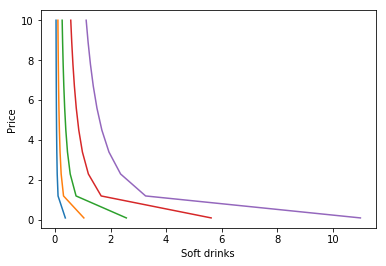

In [729]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,10)

def my_prices(p0,p=p):
    p = p.copy()
    p.loc['Soft drinks'] = p0
    return p

for x in [10,20,40,80,160]:
    plt.plot([south.demands(x,my_prices(p0))['Soft drinks'] for p0 in P],P)

plt.xlabel('Soft drinks')
plt.ylabel('Price')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,50)

def my_prices(p0,p=p):
    p = p.copy()
    p.loc['Soft drinks'] = p0
    return p

for x in [10,20,40,80,160]:
    plt.plot([west.demands(x,my_prices(p0))['Soft drinks'] for p0 in P],P)

plt.xlabel('Soft drinks')
plt.ylabel('Price')

Text(0,0.5,'Price')

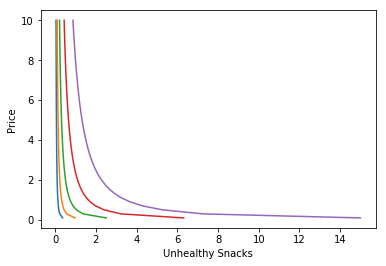

In [730]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,50)

goods = unhealthy_snacks

def my_prices_list(scale,goods = ["Bananas"], p=p):
    p = p.copy()
    for i in goods:
        try:
            p.loc[i] = scale * p.loc[i]
        except:
            continue
    return p

for x in [10,20,40,80,160]:
    plt.plot([np.sum(south.demands(x,my_prices_list(p0, goods))[goods])for p0 in P],P)

plt.xlabel('Unhealthy Snacks')
plt.ylabel('Price')

Text(0,0.5,'Price')

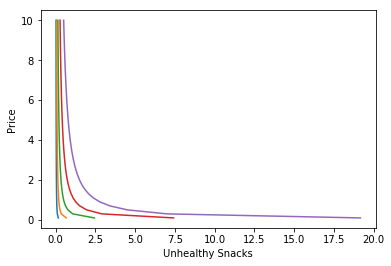

In [742]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,50)

goods = unhealthy_snacks

def my_prices_list(scale,goods = ["Bananas"], p=p):
    p = p.copy()
    for i in goods:
        try:
            p.loc[i] = scale * p.loc[i]
        except:
            continue
    return p

for x in [10,20,40,80,160]:
    plt.plot([np.sum(west.demands(x,my_prices_list(p0, goods))[goods])for p0 in P],P)

plt.xlabel('Unhealthy Snacks')
plt.ylabel('Price')

Text(0,0.5,'Price')

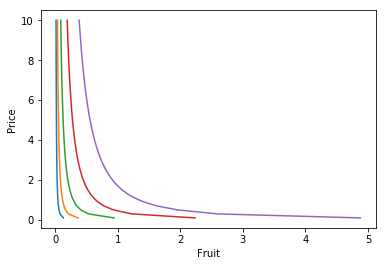

In [743]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,50)

goods = fruits

def my_prices_list(scale,goods = ["Bananas"], p=p):
    p = p.copy()
    for i in goods:
        try:
            p.loc[i] = scale * p.loc[i]
        except:
            continue
    return p

for x in [10,20,40,80,160]:
    plt.plot([np.sum(south.demands(x,my_prices_list(p0, goods))[goods])for p0 in P],P)

plt.xlabel('Fruit')
plt.ylabel('Price')

Text(0,0.5,'Price')

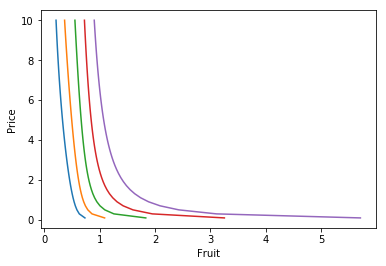

In [744]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

P = np.linspace(0.1,10,50)

goods = fruits

def my_prices_list(scale,goods = ["Bananas"], p=p):
    p = p.copy()
    for i in goods:
        try:
            p.loc[i] = scale * p.loc[i]
        except:
            continue
    return p

for x in [10,20,40,80,160]:
    plt.plot([np.sum(west.demands(x,my_prices_list(p0, goods))[goods])for p0 in P],P)

plt.xlabel('Fruit')
plt.ylabel('Price')

## Mapping to Nutrients

In [745]:
c =result.demands(x,p)

In [746]:
fct = D.transpose()
fct.index.name = "Item name"
fct = fct.fillna(0)
fct.head()

Caffeine  Calcium, Ca  \
Item name                                           
Apple juice                      0.0         17.0   
Apples                           0.0          6.0   
Bacon                            0.0         80.0   
Bagels and English muffins       0.0         21.0   
Bananas                          0.0         39.0   

                            Carbohydrate, by difference  Cholesterol  Energy  \
Item name                                                                      
Apple juice                                       46.67          0.0   183.0   
Apples                                            14.29          0.0    52.0   
Bacon                                              1.89         86.0   226.0   
Bagels and English muffins                        53.68          0.0   263.0   
Bananas                                           67.50          0.0   425.0   

                            Fatty acids, total monounsaturated  \
Item name                                                        
Apple juice                                              0.000   
Apples                                                   0.000   
Bacon                                                    6.223   
Bagels and English muffins                               0.000   
Bananas                                                  0.000   

                            Fatty acids, total polyunsaturated  \
Item name                                                        
Apple juice                                              0.000   
Apples                                                   0.000   
Bacon                                                    4.699   
Bagels and English muffins                               0.000   
Bananas                                                  0.000   

                            Fatty acids, total saturated  \
Item name                                                  
Apple juice                                         0.00   
Apples                                              0.00   
Bacon                                               4.52   
Bagels and English muffins                          0.00   
Bananas                                            12.50   

                            Fatty acids, total trans  Fiber, total dietary  \
Item name                                                                    
Apple juice                                    0.000                   0.0   
Apples                                         0.000                   3.2   
Bacon                                          0.184                   0.0   
Bagels and English muffins                     0.000                   3.2   
Bananas                                        0.000                  10.0   

                              ...     Vitamin A, RAE  Vitamin B-12  \
Item name                     ...                                    
Apple juice                   ...                0.0          0.00   
Apples                        ...                0.0          0.00   
Bacon                         ...               10.0          1.19   
Bagels and English muffins    ...                0.0          0.00   
Bananas                       ...                0.0          0.00   

                            Vitamin B-6  Vitamin C, total ascorbic acid  \
Item name                                                                 
Apple juice                       0.000                           120.0   
Apples                            0.000                             0.0   
Bacon                             0.244                             0.0   
Bagels and English muffins        0.000                             0.0   
Bananas                           0.000                             0.0   

                            Vitamin D  Vitamin D (D2 + D3)  \
Item name                                                    
Apple juice                       0.0                  0.0  

In [747]:
# Index of fct includes names of goods and also units.  Drop the latter:
try:
    fct.index = fct.index.droplevel('unit')
except AttributeError: pass # not a multiindex?

# Create a new FCT and vector of consumption that only share rows in common:
fct0,c0 = fct.align(c,axis=0,join='inner')
print(fct0.index)

Index(['Apple juice', 'Apples', 'Beans, peas, legumes',
       'Beef, excludes ground', 'Biscuits, muffins, quick breads',
       'Bottled water', 'Burgers', 'Burritos and tacos', 'Cakes and pies',
       'Candy containing chocolate', 'Candy not containing chocolate',
       'Carrots', 'Cheese', 'Chicken patties, nuggets and tenders',
       'Chicken, whole pieces', 'Chicken/turkey sandwiches', 'Citrius fruits',
       'Citrus juice', 'Coffee', 'Cookies and brownies', 'Corn',
       'Diet soft drinks', 'Dips, gravies, other sauces',
       'Doughnuts, sweet rolls, pastries', 'Egg/breakfast sandwiches',
       'Eggs and omelets', 'Fish', 'French fries and other fried potatoes',
       'Fruit drinks', 'Ice cream and frozen dairy desserts',
       'Jams, syrups, toppings', 'Lettuce and lettuce salads',
       'Macaroni and cheese', 'Mashed potatoes and white potato mixtures',
       'Meat mixed dishes', 'Milk, low fat', 'Milk, reduced fat', 'Nachos',
       'Other fruit juice', 'Other fru

In [748]:
rda = pd.read_csv('./diet_minimums.csv').copy()
rda = rda[["Nutrition", "M 9-13", "F 9-13", "M 31-50", "F 31-50"]]
rda = rda.set_index("Nutrition")

In [749]:
rda.T

Nutrition  Energy  Protein  Fiber, total dietary  Folate, DFE  Calcium, Ca  \
M 9-13     1800.0     34.0                  25.2        300.0       1300.0   
F 9-13     1600.0     34.0                  22.4        300.0       1300.0   
M 31-50    2200.0     56.0                  30.8        400.0       1000.0   
F 31-50    1800.0     46.0                  25.2        400.0       1000.0   

Nutrition  Carbohydrate, by difference  Iron, Fe  Magnesium, Mg  Niacin  \
M 9-13                           130.0       8.0          240.0    12.0   
F 9-13                           130.0       8.0          240.0    12.0   
M 31-50                          130.0       8.0          420.0    16.0   
F 31-50                          130.0      18.0          320.0    14.0   

Nutrition  Phosphorus, P    ...      Riboflavin  Thiamin  Vitamin A, RAE  \
M 9-13            1250.0    ...             0.9      0.9           600.0   
F 9-13            1250.0    ...             0.9      0.9           600.0   
M 31-50            700.0    ...             1.3      1.2           900.0   
F 31-50            700.0    ...             1.1      1.1           700.0   

Nutrition  Vitamin B-12  Vitamin B-6  Vitamin C, total ascorbic acid  \
M 9-13              1.8          1.0                            45.0   
F 9-13              1.8          1.0                            45.0   
M 31-50             2.4          1.3                            90.0   
F 31-50             2.4          1.3                            75.0   

Nutrition  Vitamin E (alpha-tocopherol)  Vitamin K (phylloquinone)  Zinc, Zn  \
M 9-13                             11.0                       60.0       8.0   
F 9-13                             11.0                       60.0       8.0   
M 31-50                            15.0                      120.0      11.0   
F 31-50                            15.0                       90.0       8.0   

Nutrition  Vitamin D  
M 9-13         600.0  
F 9-13         600.0  
M 31-50        600.0  
F 31-50        600.0  

[4 rows x 21 columns]

In [770]:
import cfe
import pandas as pd
import matplotlib.pyplot as plt

r=result
USE_GOOD = 'Milk, low fat' 
# Use prices, distribution of budgets from first round, first market:
t = r.firstround  # First round
m = r.coords['m'][0] # First market

# Distribution of predicted total expenditures
xhat = r.get_predicted_expenditures().sum('i')
xhat = xhat.where(xhat>0,np.nan)

# Note selection of prices for first period and first market
p = r.prices.sel(t=t,m=m).fillna(1).copy()

def my_prices(p0,p=p,i=USE_GOOD):
    p = p.copy()
    p.loc[i] = p0
    return p


def nutrient_demand(x,p,r):
    c = r.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

# In first round, averaged over households and villages
zbar = r.z.sel(t=r.firstround).mean(['j','m'])[:-1] # Leave out log HSize

# This matrix product gives minimum nutrient requirements for average
# household in first round
hh_rda = rda.replace('',0)@zbar

def nutrient_adequacy_ratio(x,p,r):
    return nutrient_demand(x,p,r)/hh_rda

Text(0,0.5,'log nutrient')

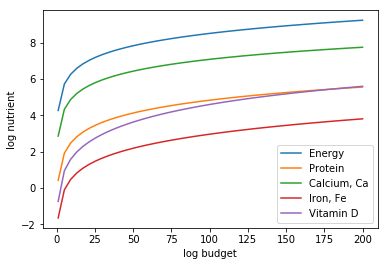

In [758]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,200,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p,result))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Text(0,0.5,'log nutrient')

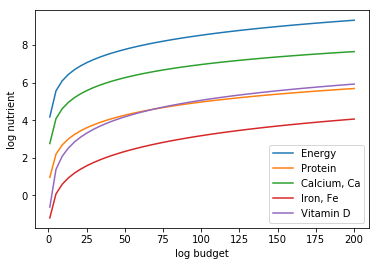

In [759]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,200,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p,south))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Text(0,0.5,'log nutrient')

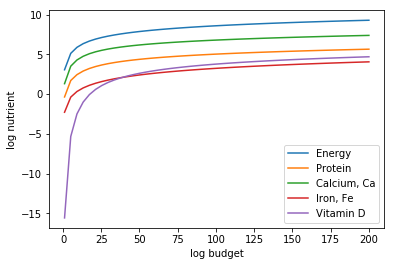

In [760]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(1,200,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_demand(x,p,west))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient')

Text(0,0.5,'log nutrient')

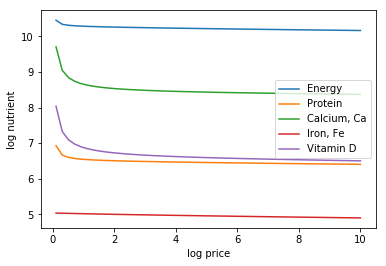

In [766]:
P = np.linspace(.1,10,50)

x = 500

plt.plot(P,pd.concat({p0:np.log(nutrient_demand(x,my_prices_list(p0,goods=dairy), result))[UseNutrients] for p0 in P},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log price')
plt.ylabel('log nutrient')

## Household Nutritional Requirements

In [767]:
# A quantile of 0.5 is the median.  Play with quantile value, or just assign.
x0 = xhat.sel(t=t,m=m).quantile(0.01,'j') # Budget (median household)
x0 = 100

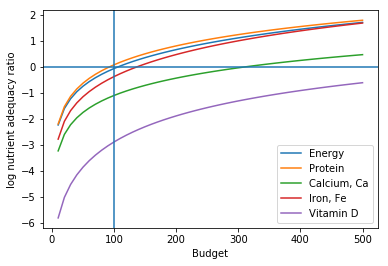

In [771]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(x0/10,x0*5,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p, result))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)
plt.axvline(x0)

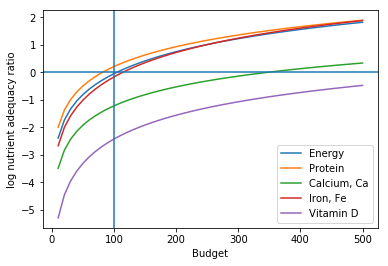

In [773]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(x0/10,x0*5,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p, south))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)
plt.axvline(x0)

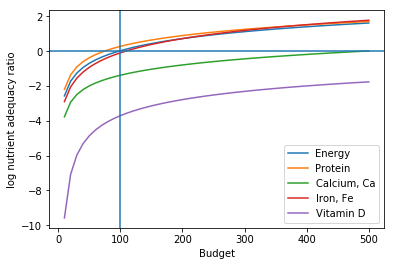

In [774]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(x0/10,x0*5,50)

UseNutrients = ['Energy', 'Protein', 'Calcium, Ca','Iron, Fe', 'Vitamin D']

plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p, west))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('Budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)
plt.axvline(x0)

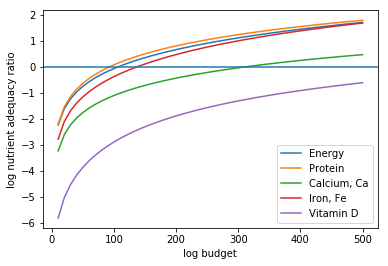

In [772]:
plt.plot(X,pd.concat({x:np.log(nutrient_adequacy_ratio(x,p, result))[UseNutrients] for x in X},axis=1).T)
plt.legend(UseNutrients)
plt.xlabel('log budget')
plt.ylabel('log nutrient adequacy ratio')
plt.axhline(0)

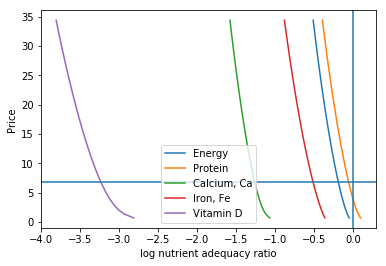

In [781]:
poorer_x = x0

# Choose reference (t,m) for reference good
ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m)
P = np.linspace(ref_price/10,ref_price*5,50)

plt.plot(pd.concat({p0:np.log(nutrient_adequacy_ratio(poorer_x,my_prices_list(p0,["Milk, reduced fat"]), result))[UseNutrients] for p0 in P},axis=1).T,P)
plt.legend(UseNutrients)
plt.ylabel('Price')
plt.xlabel('log nutrient adequacy ratio')
plt.axvline(0)
plt.axhline(p.sel(i="Milk, reduced fat").values)

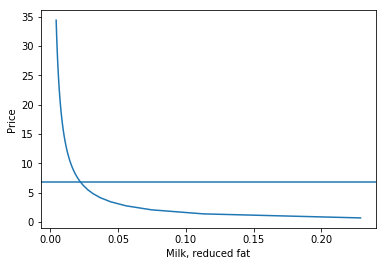

In [787]:
plt.plot([result.demands(poorer_x,my_prices_list(p0,["Milk, reduced fat"]))["Milk, reduced fat"] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel('Milk, reduced fat')
plt.axhline(p.sel(i="Milk, reduced fat").values)

## Compensated Policy Experiment

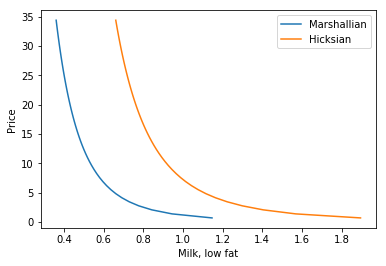

In [788]:
U0 = cfe.demands.marshallian.indirect_utility(x0,p,np.exp(r.alpha),r.beta,0)

plt.plot([r.demands(poorer_x,my_prices(p0,i=USE_GOOD))[USE_GOOD] for p0 in P],P)
plt.plot([r.demands(poorer_x,my_prices(p0,i=USE_GOOD),type="Hicksian")[USE_GOOD] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(USE_GOOD)
#plt.axhline(p.sel(i=USE_GOOD).values)
plt.legend(("Marshallian","Hicksian"))

In [789]:
def compensating_variation(U0,p0,p1):
    x0 = cfe.demands.hicksian.expenditurefunction(U0,p0,np.exp(r.alpha),r.beta,0)
    x1 = cfe.demands.hicksian.expenditurefunction(U0,p1,np.exp(r.alpha),r.beta,0)

    return x1-x0

compensating_variation(U0,p,my_prices(1))

-4.242611369150083

In [791]:
def compensating_variation(U0,p0,p1):
    x0 = r.expenditure(U0,p0)
    x1 = r.expenditure(U0,p1)

    return x1-x0

def revenue(U0,p0,p1,type='Marshallian'):
    """(Un)Compensated revenue from taxes changing vector of prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    
    dp = p1 - p0 # Change in prices

    return dp.T@r.demands(U0,p1,type=type)


def deadweight_loss(U0,p0,p1):
    """
    Deadweight loss of tax/subsidy scheme creating wedge in prices from p0 to p1.

    Note that this is only for *demand* side (i.e., if supply perfectly elastic).
    """
    cv = compensating_variation(U0,p0,p1)

    return revenue(U0,p0,p1,type='Hicksian') - cv
    
    
def compensated_nutrient_demand(U,p,z=None):
    c = r.demands(U,p,z=z,type='Hicksian')
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    return N

def compensated_nutrient_adequacy_ratio(U,p):
    return compensated_nutrient_demand(U,p)/hh_rda

Text(0.5,0,'Price of Milk, low fat')

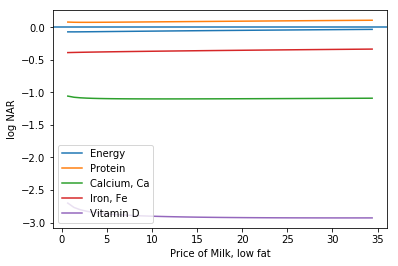

In [792]:
fig,ax2 = plt.subplots()
ax2.set_ylabel('log NAR')
ax2.plot(P,[np.log(compensated_nutrient_adequacy_ratio(U0,my_prices(p0))[UseNutrients]) for p0 in P])
ax2.legend(UseNutrients)
ax2.axhline(0)
ax2.set_xlabel("Price of %s" % USE_GOOD)

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [794]:
result.get_beta().to_dataframe().sort_values(by=["beta"], ascending=False).head(10)

beta
i                                        
Tomato-based condiments          1.342278
Sausages                         1.174279
Yeast breads                     1.104172
Jams, syrups, toppings           1.043869
Milk, reduced fat                1.018949
Cheese                           1.000889
Pork                             0.920667
Beef, excludes ground            0.889091
Beans, peas, legumes             0.886922
White potatoes, baked or boiled  0.866962

In [795]:
south.get_beta().to_dataframe().sort_values(by=["beta"], ascending=False).head(10)

beta
i                                        
Sausages                         1.428693
Corn                             1.358592
Beans, peas, legumes             1.250421
Yeast breads                     1.072304
White potatoes, baked or boiled  1.032191
Cookies and brownies             0.911600
Milk, reduced fat                0.900944
Cakes and pies                   0.895160
Eggs and omelets                 0.895140
Beef, excludes ground            0.879912

In [796]:
west.get_beta().to_dataframe().sort_values(by=["beta"], ascending=False).head(10)

beta
i                                              
Lettuce and lettuce salads             1.607840
Chicken, whole pieces                  1.195538
Beef, excludes ground                  1.180215
Rolls and buns                         1.143269
Yeast breads                           1.119463
Cakes and pies                         1.094314
Tea                                    1.090996
French fries and other fried potatoes  1.000226
Other vegetables and combinations      0.966408
Eggs and omelets                       0.906662

That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)

Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



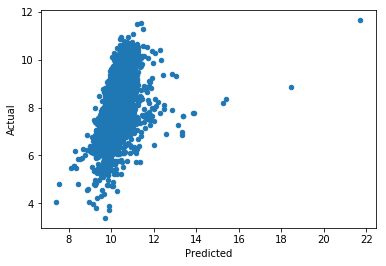

In [797]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

result.get_predicted_log_expenditures()

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

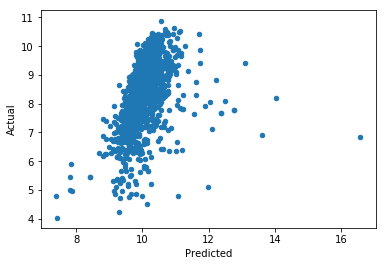

In [798]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

south.get_predicted_log_expenditures()

xbar = np.exp(south.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

xhat = south.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

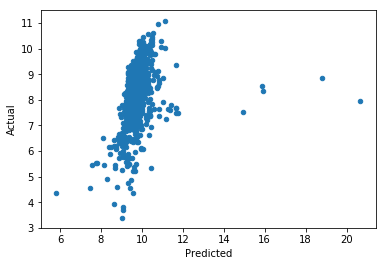

In [799]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

west.get_predicted_log_expenditures()

xbar = np.exp(west.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()

xhat = west.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')